<a href="https://colab.research.google.com/github/marcosilvaa/dados_estudos/blob/main/Backtesting_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BackTesting com Python

 **O que é BackTesting?**
 > *Buscar os dados do passado de um ativo, e ver qual o desempenho de determinada estratégia em cima desse ativo.*

Backtest pode e deve ser realizado em qualquer mercado, seja o mercado de ações, ETFs, cripto, etc. Cada estratégia vai apresentar um desempenho diferente em cada mercado que for analisado, e a mesma estratégia pode também apresentar um desempenho diferente dentro do mesmo mercado, dependendo da fase do ciclo em que ele se encontra, se está em plena tendência de alta ou baixa, se está em um período de lateralidade, reversão, período de alta volatilidade. Portanto uma estratégia deve ser testada de diversas formas diferentes, em períodos diferentes, configurações diferentes.

Lembrando que:
> ***Retornos passados não garantem os mesmos retornos no futuro.***

Porém quando se trata de mercado financeiro e estratégias de operações, realizar simulações com os dados passados é a única alternativa.

Para realizar essa tarefa, o Python é a ferramenta perfeita, com ele podemos criar uma estrutura que nos permitirá realizar as mais variadas estratégias, e ver em qual das estratégias um determinado ativo apresentou um melhor comportamento. 



####Quais Bibliotecas Utilizar?
* Zipline (Quantopian)
* Backtrader
* Blueshift (QuantInsti)
* Lean (QuantConnect)
* Vectorbt -> Foco em Criptomoedas
* PyAlgoTrader
* Bt
* Finmarketpy (Cuemacro)
* Fastquant

##Problemas com o BackTest

* **Survirvorship Bias** (Viés de sobrevivência)

  Normalmente utiliza-se apenas dados de empresas já consolidadas para realizar as análises, porém ao longo do tempo, diversas empresas acabam fechando por algum motivo, acabam falindo ou até sendo incorporadas em outras empresas. 
  
  É importante ficar atento a casos assim, pois podemos descobrir o porque essas empresas saíram do mercado, quais resultados elas apresentavam no final da sua vida, e então ficar atentos se estes mesmos sinais surgem em empresas do momento. No caso de uma empresa ser incorporada à outra, é possível análisar o desempenho de ambas empresas antes de ocorrer essa fusão, e relacionar com o desempenho dessa "nova empresa" que acabara de surgir.

* **Insufficiente Sample Bias** (Viés de amostra insuficiente)

  Ocorre quando o backtest é realizado em cima de uma amostragem muito pequena, poucos dados, pouco histórico, fazendo com que o modelo estatístico não tenha informações suficientes do ativo, diminuindo sua acurácia. 

* **Look Ahead Bias** (Viés de Futuro)

  Quando ao programar um backtest com dados do passado, traçar uma estratégia que já está visando ou esteja preparada para um acontecimento futuro. 

  Por Exmplo, uma estratégia aplicada em um ativo no período de 2018 até 2021, as métricas a serem utilizadas, os *bias* do modelo, não podem ser definidos de modo que o crash causado pela Covid-19 passe de certa forma despecebido, fazendo com que a estratégia não sofra nenhuma ou pouca perca de desempenho durante o ano de 2020. 

* **Temporal Bias** (Viés Temporal)

  Uma estratégia que seja baseada em uma caracterítica muito específica do ativo, que foi causada por algum evento que não irá necessariamente ocorre novamente, dessa forma a estratégia fica sucetível a pequenas mudanças que ocorrem dentro do regime da empresa. 

  Sendo assim é preciso procurar características atemporais, que ocorrem de forma natural dentro do ativo. 

* **Data-Mining Bias** (Viés de Mineração)
  
  Quando a estratégia criada foi moldada de forma que se encaixe perfeitamente naqueles dados, comparar casos distintos e afirmar que há uma correlação entre os dados, sendo que não há uma causa real por trás daquilo, apenas uma métrica manipulada.

* **Viés de Liquidez** 

  A liquidez de um ativo deve ser considerada quando a ideia é realizar *trades*, uma vez que a liquidez de um ativo influência de forma direta no seu preço. 

  Procurar sempre ativos que tenham um valor mínimo determinado de liquidez, evitando ativos pouco líquidos. 

* **Optimal Period Bias** (Viés de Período Perfeito)

  Como já foi mencionado, cada período dentro de um ativo vai nos mostrar um determinado comportamento, portanto deve-se buscar estudar o ativo com o maior número de eventos possíveis, para não fazer com que o estudo seja manipulado de forma a mostrar apenas os bons resultados.

  Caso a estratégia seja testada em um curto período específico, na hora da análise considererar em qual parte do ciclo de mercado esse ativo se encontrava, e até realizar um estudo em outros períodos dentro desse mesmo ativo, e comparando o desempenho da estratégia de forma isolada. 

* **Custo de Transação**

  Quando se trata de uma estratégia de trading de longa duração, como um swing trade ou um position trading, dependendo do ativo à ser negociado assim como da corretora utilizada, as taxas de operação podem ser irrelevantes e acabam sendo embutidas dentro da operação de forma que não interfira no resultado final.

  Já as estratégias de ***day-trading*** ou ***scalp-trading***, principalmente estratégias de ***High Frequency Trading***  (Trade de alta frequência, centenas e até milhares de operações diárias), essas podem ter um elevado custo operacional que deve ser considerado na hora de realizar um backtest, evitando que os resultados reais tenham grandes divergências do estudo realizado.

## Biblioteca BackTrader

Principal biblioteca para backtesting, integrada com a TA-Lib. 

Uma biblioteca ágil e versátil, do tipo *low-code* (pouco código & muito retorno), com frameworks prontos, construída por traders para traders. 

Estrutura básica:

```
# Criando Estratégia
>>> class Estrategia(bt.Strategy):
       def next(self):
       pass

# Inicializando o Cerebro
>>> cerebro = bt.Cerebro()

# Adicionando Estratégia
>>> cerebro.addstrategy(Estrategia)

# Rodando estratégia
>>> cerebro.run()
```




In [ ]:
# instalando bibliotecas
!pip install backtrader
!pip install yfinance

In [3]:
import backtrader as bt
import yfinance as yf

import pandas as pd
import datetime
import matplotlib.pyplot as plt

## Conceito de Classes - Python

A principal função da classe é agrupar funções que precisam ser executadas simultâneamente ou em ordem a partir de parâmetros pré definidos.

In [4]:
class Carro:
  def __init__(self):
    self.marca = 'Mercedes'
    self.modelo = 'C180'
    self.cor = 'Vermelho'

pass

In [9]:
carro_exemplo = Carro()
print(carro_exemplo)
print('............')
print(carro_exemplo.modelo)

............
C180


In [13]:
# criando classe dinâmmica

class Carro:
  def __init__(self, marca, modelo, cor):
    self.marca = marca
    self.modelo = modelo
    self.cor = cor
  def Ligar(self):
    print('Carro está ligado')
  def ExibirInfoCarro(self):
    print(self.marca, self.modelo, self.cor)

In [17]:
carro2 = Carro('Volvo', 'XC60', 'Azul')
carro2.Ligar()
carro2.ExibirInfoCarro()

Carro está ligado
Volvo XC60 Azul


## Obtendo Dados com a YFinance

In [99]:
from datetime import date
# criando variável para data de hoje
data_atual = date.today()

# convertendo data para formato String
data_atual = data_atual.strftime("%Y-%m-%d")

data_atual

'2022-07-25'

In [149]:
data = bt.feeds.PandasData(dataname = yf.download('BTC-USD', '2017-05-30', data_atual, auto_adjust = True, interval='1d'))

[*********************100%***********************]  1 of 1 completed


## Entendendo a Estrutura

In [150]:
class PrintFechamento(bt.Strategy):

  def __init__(self):
    #criar variável DataClose e deixa-la como referência da linha final [0] da série de dados
    self.dataclose = self.datas[0].close

  # criando função de log que captura a data do ultimo datapoint do dataset
  def log(self, txt, dt=None):
    dt = dt or self.datas[0].datetime.date(0)
    print(f'{dt.isoformat()} {txt}')
  def next (self):
    self.log('Fechamento, %.2f' % self.dataclose[0])

In [ ]:
# Inicializando o cerebro

cerebro = bt.Cerebro()

# adicionar dados para backtesting
cerebro.adddata(data)

# adicionar estratégia
cerebro.addstrategy(PrintFechamento)

# executar
cerebro.run()

## Testando Estratégia: Cruzamento de Médias Móveis


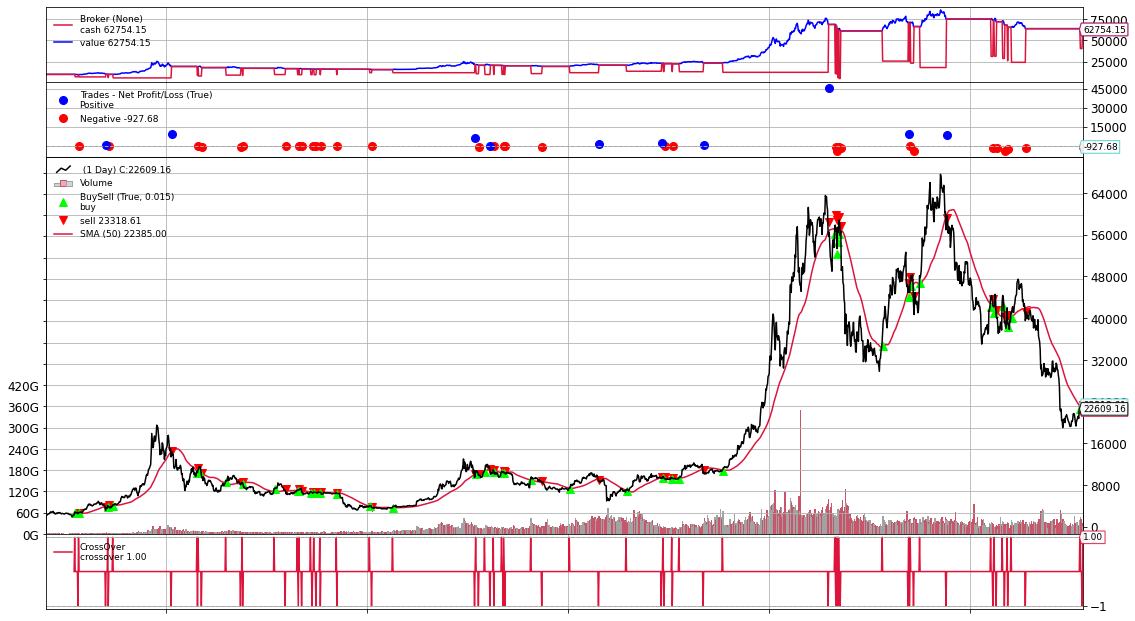

[[<Figure size 1152x648 with 5 Axes>]]

In [152]:
%matplotlib inline

class MMSCruzamento(bt.SignalStrategy):
  def __init__(self):
    mms = bt.ind.SMA(period = 50)
    preco = self.data
    cruzamento = bt.ind.CrossOver(preco, mms)
    self.signal_add(bt.SIGNAL_LONG, cruzamento)

cerebro = bt.Cerebro()

cerebro.addstrategy(MMSCruzamento)
cerebro.adddata(data)
cerebro.run()
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams.update({'font.size':12})
cerebro.plot(iplot=False)

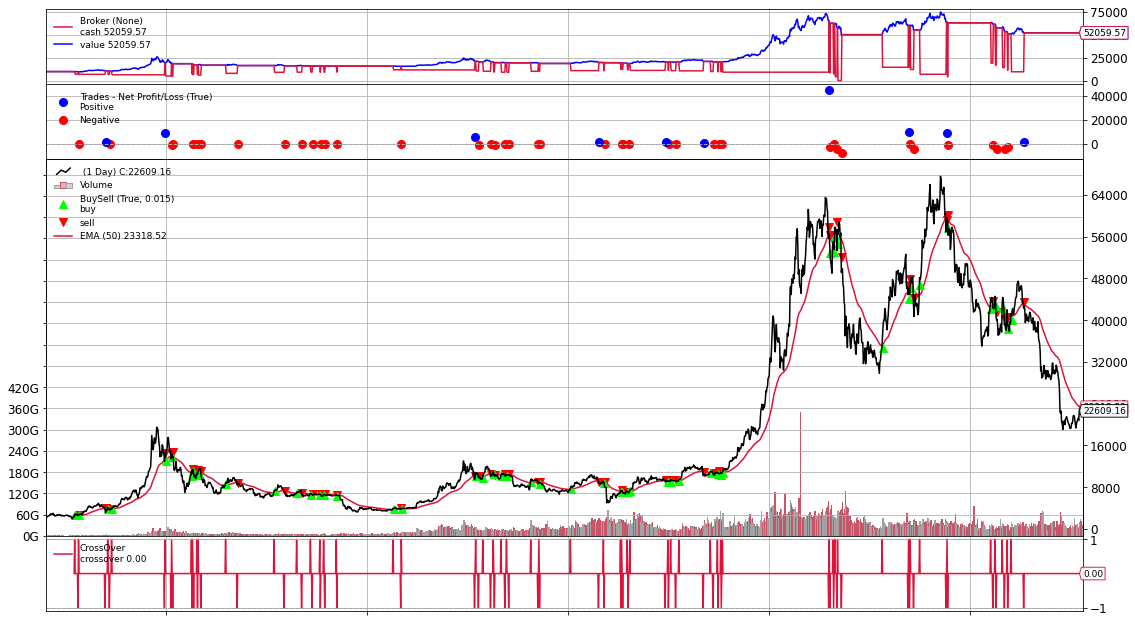

[[<Figure size 1152x648 with 5 Axes>]]

In [153]:
%matplotlib inline

class EMACruzamento(bt.SignalStrategy):
  def __init__(self):
    ema = bt.ind.EMA(period = 50)
    preco = self.data
    cruzamento = bt.ind.CrossOver(preco, ema)
    self.signal_add(bt.SIGNAL_LONG, cruzamento)

cerebro = bt.Cerebro()

cerebro.addstrategy(EMACruzamento)
cerebro.adddata(data)
cerebro.run()
plt.rcParams['figure.figsize'] = [16,9]
plt.rcParams.update({'font.size':12})
cerebro.plot(iplot=False)